In [2]:
import pandas as pd

In [9]:
# import data, skiprows=1 karena data di csv mulai dari baris ke-2
df = pd.read_csv("Dataset-PT.csv",skiprows=1)

In [10]:
df.head()

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1


In [11]:
df.columns

Index(['Calendar_date', 'route_id', 'bus_id', 'stop_sequence', 'arrival_delay',
       'dwell_time', 'travel_time_for_previous_section',
       'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay',
       'previous_bus_delay', 'previous_trip_travel_time', 'traffic_condition',
       'recurrent_delay', 'weather', 'temperature', 'day_of_week',
       'time_of_day', 'factor(weather)Light_Rain', 'factor(weather)Light_Snow',
       'factor(weather)Normal', 'factor(weather)Rain', 'factor(weather)Snow',
       'factor(temperature)Cold', 'factor(temperature)Extra_cold',
       'factor(temperature)Normal', 'factor(day_of_week)weekday',
       'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak',
       'factor(time_of_day)Morning_peak', 'factor(time_of_day)Off-peak'],
      dtype='object')

In [12]:
df = df.drop(['weather', 'temperature', 'day_of_week','time_of_day','Calendar_date','bus_id','route_id'], axis=1)

In [13]:
df.head()

,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,traffic_condition,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,1,151,0,0,120,100,100,160,216,168.666667,...,0,0,0,0,1,0,1,0,0,1
1,2,185,24,171,45,151,100,198,47,46.333333,...,0,0,0,0,1,0,1,0,0,1
2,3,186,0,55,41,185,100,189,32,36.666667,...,0,0,0,0,1,0,1,0,0,1
3,4,202,12,42,94,186,100,200,89,88.000000,...,0,0,0,0,1,0,1,0,0,1
4,5,242,21,98,86,202,100,256,123,102.000000,...,0,0,0,0,1,0,1,0,0,1


In [14]:
corr_matrix = df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

arrival_delay                        1.000000
upstream_stop_delay                  0.975019
origin_delay                         0.716324
previous_bus_delay                   0.265434
factor(day_of_week)weekend           0.190783
factor(time_of_day)Off-peak          0.138109
stop_sequence                        0.092616
dwell_time                           0.089433
travel_time_for_previous_section     0.081113
factor(weather)Normal                0.022642
factor(temperature)Normal            0.022444
factor(weather)Rain                  0.010833
factor(weather)Snow                 -0.001579
factor(weather)Light_Snow           -0.012642
factor(temperature)Cold             -0.013595
factor(temperature)Extra_cold       -0.024602
factor(weather)Light_Rain           -0.027323
previous_trip_travel_time           -0.036870
traffic_condition                   -0.043104
recurrent_delay                     -0.069122
factor(time_of_day)Morning_peak     -0.079354
factor(time_of_day)Afternoon_peak 

In [23]:
import numpy as np
import pandas as pd

# Step 1: Calculate the median of the arrival_delay column
median_origin_delay = np.median(df['origin_delay'])

# Step 2: Calculate the absolute distance from the median
df['distance_from_median'] = abs(df['origin_delay'] - median_origin_delay)

# Step 3: Sort by distance from the median in descending order
df_sorted = df.sort_values(by='distance_from_median', ascending=False)

# Step 4: Calculate how many rows correspond to 5% of the data
num_outliers = int(0.001 * len(df))

# Step 5: Mark top 5% rows as outliers (add 'outlier' attribute)
df_sorted['outlier'] = 0  # Default to 0 (not an outlier)
df_sorted.iloc[:num_outliers, df_sorted.columns.get_loc('outlier')] = 1  # Set top 5% as outliers

# Step 6: Identify all 'bus_id' that have at least one outlier
outlier_bus_ids = df_sorted[df_sorted['outlier'] == 1]['origin_delay'].unique()

# Step 7: Remove all rows that have a 'bus_id' in 'outlier_bus_ids'
df_final = df_sorted[~df_sorted['origin_delay'].isin(outlier_bus_ids)]

# Step 8: Drop temporary column 'distance_from_median'
df_final = df_final.drop(columns=['distance_from_median'])

# Optional: Display the results
print(f"Total buses with outliers: {len(outlier_bus_ids)}")
print(f"Number of initial outliers: {num_outliers}")
print(f"Number of rows after removing buses with outliers: {len(df_final)}")
print(f"Removed rows: {len(df)-len(df_final)}")

Total buses with outliers: 21
Number of initial outliers: 545
Number of rows after removing buses with outliers: 544536
Removed rows: 567


In [24]:
df = df_final
df = df.drop(['factor(weather)Normal', 'factor(temperature)Normal', 'factor(weather)Rain', 'factor(weather)Snow', 'factor(weather)Light_Snow', 'factor(temperature)Cold', 'factor(temperature)Extra_cold', 'factor(weather)Light_Rain', 'previous_trip_travel_time', 'traffic_condition'],  axis=1)

In [25]:
x = df.drop(['arrival_delay'], axis=1)
x.head()

,stop_sequence,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,recurrent_delay,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak,outlier
312621,16,22,46,139,973,989,74,105.727273,0,1,0,0,1,0
312608,3,44,43,69,1019,989,11,44.272727,0,1,0,0,1,0
312607,2,31,211,75,1020,989,23,48.670455,0,1,0,0,1,0
312629,24,0,42,115,995,989,38,84.840909,0,1,0,0,1,0
312628,23,25,44,55,983,989,46,37.920455,0,1,0,0,1,0


In [26]:
y = df['arrival_delay']
y.head()

312621     978
312608    1029
312607    1019
312629     962
312628     995
Name: arrival_delay, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_LR = LinearRegression()

# Fit the model to the training data
model_LR.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred_LR = model_LR.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print(f"Mean Absolute Error: {mae_LR}")
print(f"Mean Squared Error: {mse_LR}")
print(f"R-squared: {r2_LR}")

Mean Absolute Error: 12.59900050206839
Mean Squared Error: 380.14345276601483
R-squared: 0.989320494133731


                              Feature  Coefficient
4                 upstream_stop_delay     1.006001
1                          dwell_time     0.984482
7                     recurrent_delay     0.971984
3               scheduled_travel_time    -0.963733
8          factor(day_of_week)weekday     0.551202
9          factor(day_of_week)weekend    -0.551202
11    factor(time_of_day)Morning_peak     0.484410
12        factor(time_of_day)Off-peak    -0.349165
10  factor(time_of_day)Afternoon_peak    -0.135246
0                       stop_sequence    -0.067697
2    travel_time_for_previous_section     0.010759
6                  previous_bus_delay     0.007514
5                        origin_delay    -0.003862
13                            outlier     0.000000


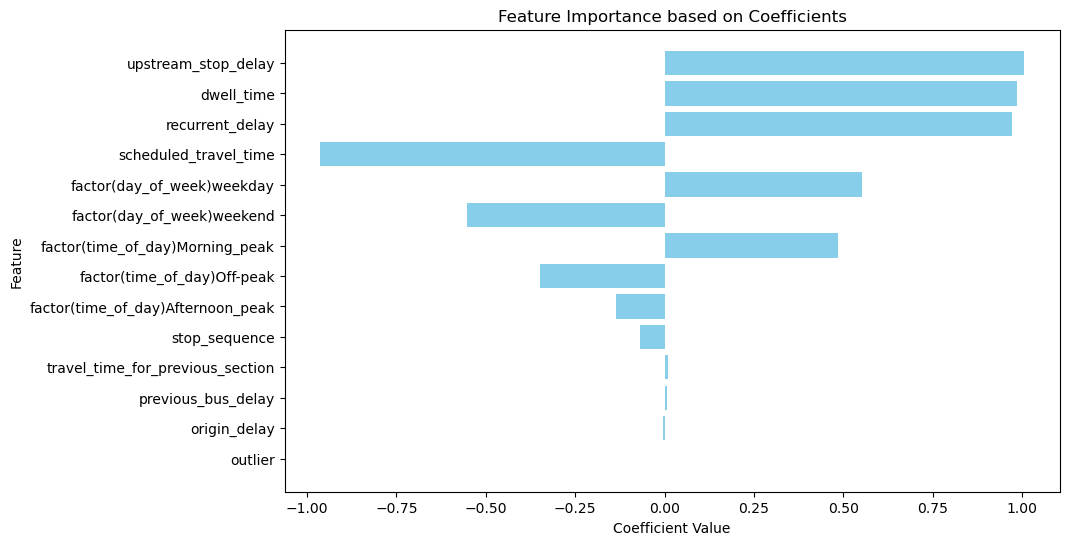

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the model has been trained before accessing the coefficients
# Example: model_LR = LinearRegression().fit(X_train, y_train)

# Get coefficients from the linear regression model
coefficients = model_LR.coef_

# Create a DataFrame to store features and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Create an absolute value column for sorting
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()

# Sort features by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

# Display the features with the highest influence (sorted by coefficient)
print(coef_df[['Feature', 'Coefficient']])

# Plot the coefficients for each feature
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on Coefficients')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest at the top
plt.show()


In [31]:
import joblib
import pandas as pd

# Mapping for stop names to numbers
stop_mapping = {
    'skanstull': 1, 'eriksdal': 2, 'rosenlund': 3, 'södrastation': 4,
    'hornsgatan/rosenlundsgatan': 5, 'zinkensdamm': 6, 'varvsgatan': 7, 
    'hornstull': 8, 'högalidsgatan': 9, 'västerbroplan': 10, 'mariebergsgatan': 11,
    'fridhemsplan': 12, 'flemminggatan': 13, 'steriksplan': 14, 'dalagatan': 15,
    'odenplan': 16, 'stadsbiblioteket': 17, 'roslagsgatan': 18, 'vallhallavägen': 19,
    'östrastation': 20, 'stadion': 21, 'musikhögskolan': 22, 'jungfrugatan': 23,
    'värtavägen': 24, 'banergatan': 25, 'garnisonen': 26, 'radiohuset': 27
}

# Load model function
def load_trained_model(filepath):
    model = joblib.load(filepath)
    return model

# Function to get stop number from user input (either a number or a name)
def get_stop_number(prompt):
    user_input = input(prompt).strip().lower().replace(" ", "")
    if user_input.isdigit() and 1 <= int(user_input) <= 27:
        return int(user_input)
    elif user_input in stop_mapping:
        return stop_mapping[user_input]
    else:
        print("Invalid stop. Please enter a valid stop number (1-27) or stop name.")
        return get_stop_number(prompt)

# Function to get time factors
def get_time_factors():
    time_of_week = input("Is it a weekday or weekend? (Enter 'weekday' or 'weekend'): ").strip().lower()
    if time_of_week == 'weekday':
        weekday = 1
        weekend = 0
    elif time_of_week == 'weekend':
        weekday = 0
        weekend = 1
    else:
        print("Invalid input. Please enter 'weekday' or 'weekend'.")
        return get_time_factors()

    morning_peak, afternoon_peak, off_peak = get_time_of_day()
    return {
        'factor(day_of_week)weekday': weekday,
        'factor(day_of_week)weekend': weekend,
        'factor(time_of_day)Afternoon_peak': afternoon_peak,
        'factor(time_of_day)Morning_peak': morning_peak,
        'factor(time_of_day)Off-peak': off_peak
    }

def get_time_of_day():
    time_of_day = input("Is it Morning peak, Afternoon peak, or Off-peak? (Enter 'morning', 'afternoon', or 'off-peak'): ").strip().lower()
    if time_of_day == 'morning':
        return 1, 0, 0
    elif time_of_day == 'afternoon':
        return 0, 1, 0
    elif time_of_day == 'off-peak':
        return 0, 0, 1
    else:
        print("Invalid input. Please enter 'morning', 'afternoon', or 'off-peak'.")
        return get_time_of_day()

# Function to get user input
def get_user_input():
    get_off_stop = get_stop_number("Enter stop you're going to (1-27 or stop name): ")
    user_data = {
        'stop_sequence': get_stop_number("Enter stop you're at (1-27 or stop name): "),
        'dwell_time': int(input("Enter dwell_time (in seconds): ")),
        'travel_time_for_previous_section': int(input("Enter travel_time_for_previous_section (in seconds): ")),
        'scheduled_travel_time': int(input("Enter scheduled_travel_time (in seconds): ")),
        'upstream_stop_delay': int(input("Enter upstream_stop_delay (in seconds): ")),
        'origin_delay': int(input("Enter origin_delay (in seconds): ")),
        'previous_bus_delay': int(input("Enter previous_bus_delay (in seconds): ")),
        'recurrent_delay': float(input("Enter recurrent_delay (in seconds): "))
    }

    time_factors = get_time_factors()
    user_data.update(time_factors)
    
    return user_data, get_off_stop

# Load the trained model
filepath = 'linear_regression_model.pkl'
model_LR = load_trained_model(filepath)

# Get input from user
input_data, get_off_stop = get_user_input()
input_df = pd.DataFrame([input_data])

# Ensure 'distance_from_median' is added if missing
if 'distance_from_median' not in input_df.columns:
    input_df['distance_from_median'] = 0  # Default value

# Get the feature names from the trained model
feature_names = model_LR.feature_names_in_

# Add missing columns with default values (0)
for col in feature_names:
    if col not in input_df.columns:
        input_df[col] = 0

# Ensure the columns are in the correct order expected by the model
input_df = input_df[feature_names]

# Make the first prediction at the starting stop
prediction_start_station = model_LR.predict(input_df)

# Update the stop_sequence for the destination stop
input_df.loc[0, 'stop_sequence'] = get_off_stop

# Make the second prediction at the destination stop
prediction_end_station = model_LR.predict(input_df)

# Output the predictions'
print(f"Predicted arrival_delay at your station: {prediction_start_station[0]}")
print(f"Predicted arrival_delay at your destination: {prediction_end_station[0]}")


Predicted arrival_delay at your station: 51.41118313607839
Predicted arrival_delay at your destination: 50.096009872109065
